In [46]:
import numpy as np
import sep

In [47]:
# more setup for reading the image and showing the plots
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

%matplotlib inline

rcParams['figure.figsize']=[10.0, 8.0]

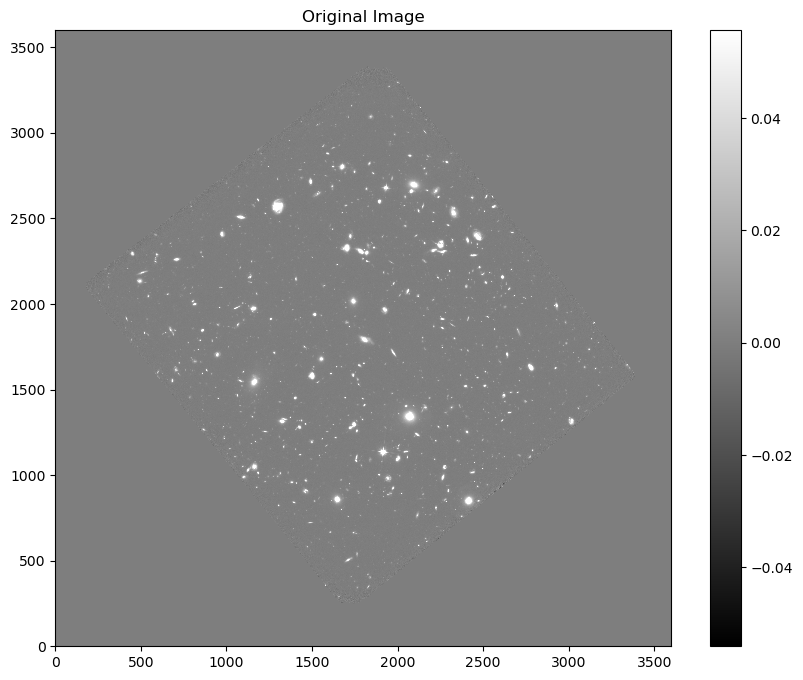

In [48]:
# read image into standard 2-d numpy array 
data = fits.open("/Users/hassanafify/Desktop/ASTR19/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")[0].data

# "image_data" now contains the image data as a NumPy array
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.title("Original Image")
plt.savefig("original_image.png")

Global Background: 0.0
Global Background RMS: 0.0005398219218477607


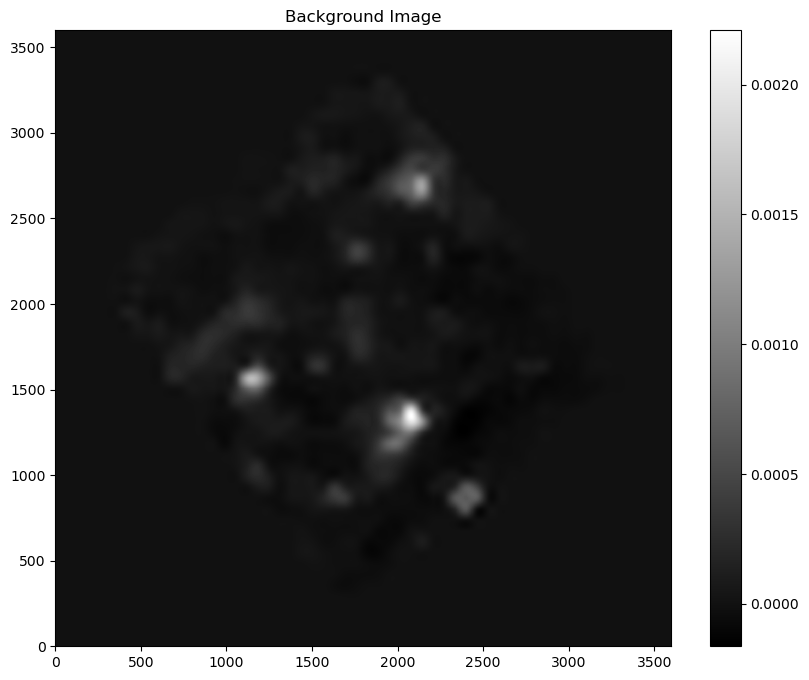

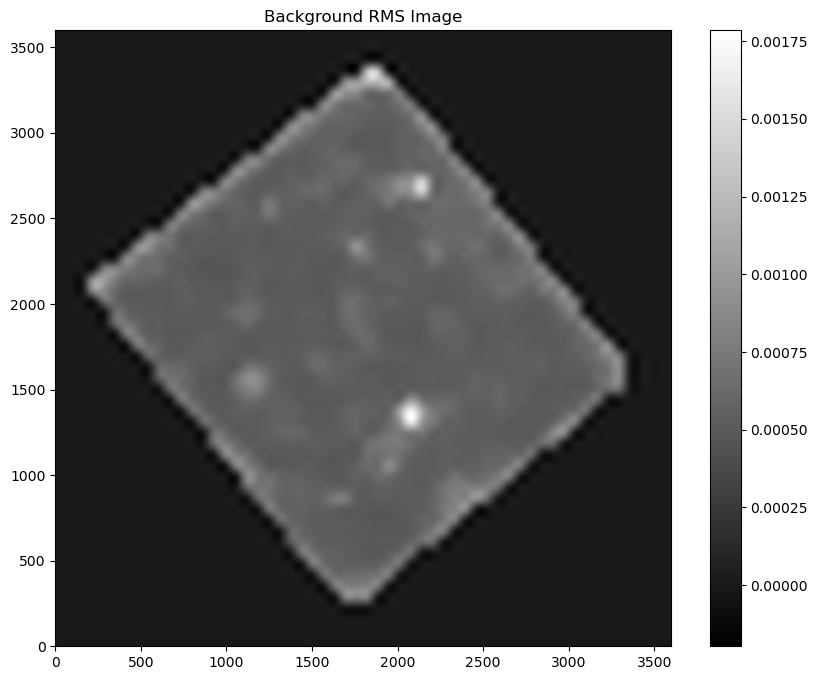

In [49]:
# changing the byte order of the array 'data'
data = data.byteswap().newbyteorder()
# measure a spatially background on the image
bkg = sep.Background(data)

# Display global background statistics
print("Global Background:", bkg.globalback)
print("Global Background RMS:", bkg.globalrms)

# Get the 2D background and noise
bkg_image = bkg.back()
bkg_rms = bkg.rms()

# Display the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background Image")
plt.savefig("background_image.png")
plt.show()

# Display the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background RMS Image")
plt.savefig("background_rms_image.png")
plt.show()


# Subtract the background
data_sub = data - bkg


('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

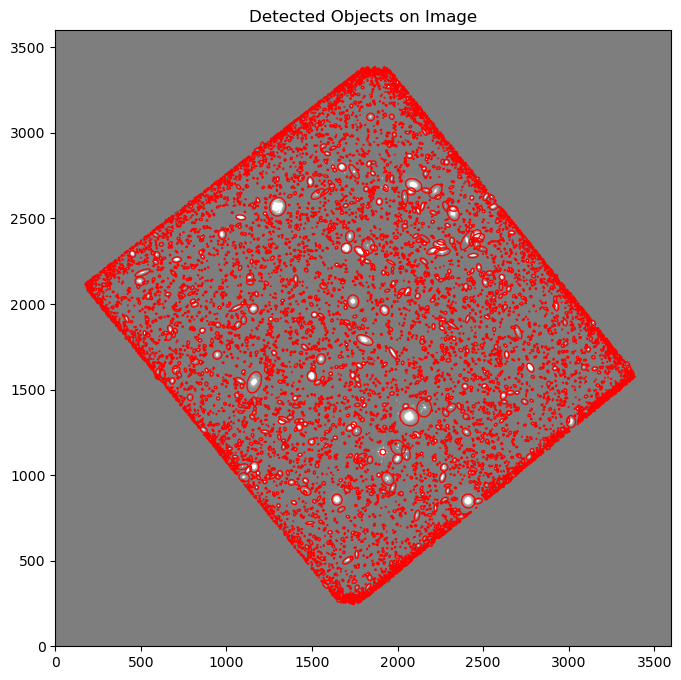

In [50]:
sep.set_extract_pixstack(600000)
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
len(objects)

from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.title("Detected Objects on Image")
plt.savefig("detected_objects_on_image.png")


# available fields
objects.dtype.names


In [52]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

data = data.byteswap(inplace=True).newbyteorder()

objects = sep.extract(data_sub, thresh=1.5, err=bkg.globalrms)
print(f"Detected {len(objects)} objects.")

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877
Detected 8640 objects.


Image Shape: (3600, 3600)
Mean Value: 0.00079129904
Standard Deviation: 0.054868452
Number of Sources Detected: 8640


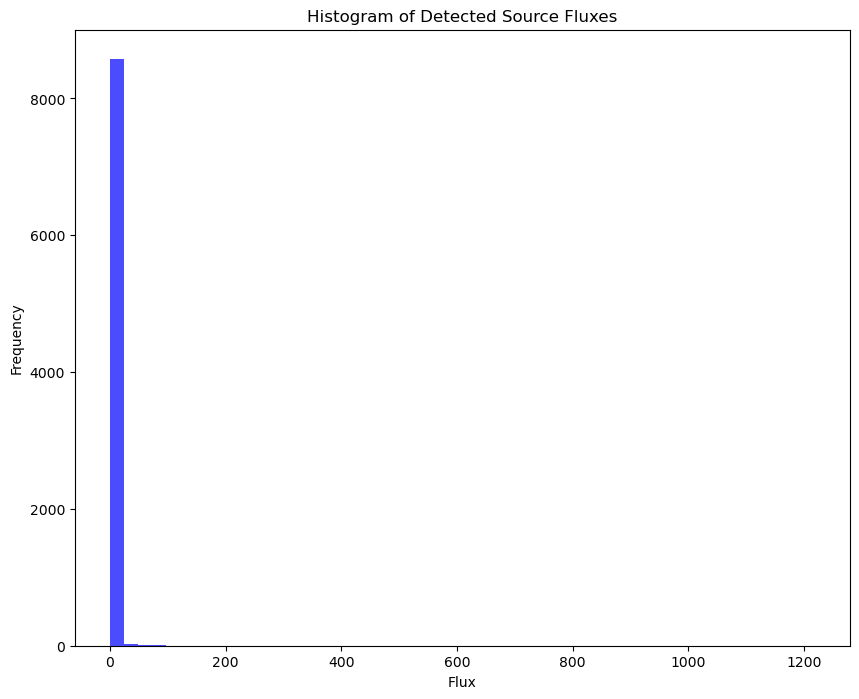

In [62]:
image_data = image_data.byteswap().newbyteorder()
# Load the FITS file
image_data = fits.open("/Users/hassanafify/Desktop/ASTR19/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")[0].data

# Display basic stats of the image
print("Image Shape:", image_data.shape)
print("Mean Value:", np.mean(image_data))
print("Standard Deviation:", np.std(image_data))

# Subtract Background
image_data = image_data.byteswap().newbyteorder()
bkg = sep.Background(image_data)
data_sub = image_data - bkg

# Detect Sources
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
print(f"Number of Sources Detected: {len(objects)}")

# Plot Histogram of Fluxes
fluxes = [obj['flux'] for obj in objects]
plt.hist(fluxes, bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Detected Source Fluxes")
plt.xlabel("Flux")
plt.ylabel("Frequency")
plt.show()



In [63]:
image_data = image_data.byteswap().newbyteorder()
# Compute Statistics
mean_flux = np.mean(fluxes)
median_flux = np.median(fluxes)
std_flux = np.std(fluxes)
print(f"Mean Flux: {mean_flux}")
print(f"Median Flux: {median_flux}")
print(f"Standard Deviation of Flux: {std_flux}")

# Find Outlier
max_flux = max(fluxes)
outlier_index = np.argmax(fluxes)
outlier_location = (objects[outlier_index]['x'], objects[outlier_index]['y'])
outlier_deviation = (max_flux - mean_flux) / std_flux

print(f"Largest Outlier Flux: {max_flux}")
print(f"Outlier Location: {outlier_location}")
print(f"Outlier Deviation from Mean: {outlier_deviation} standard deviations")

Mean Flux: 1.1726778032851009
Median Flux: 0.034888697788119316
Standard Deviation of Flux: 17.5474209122515
Largest Outlier Flux: 1218.3980712890625
Outlier Location: (1914.2549094866436, 1134.3164850725645)
Outlier Deviation from Mean: 69.3677663271825 standard deviations


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


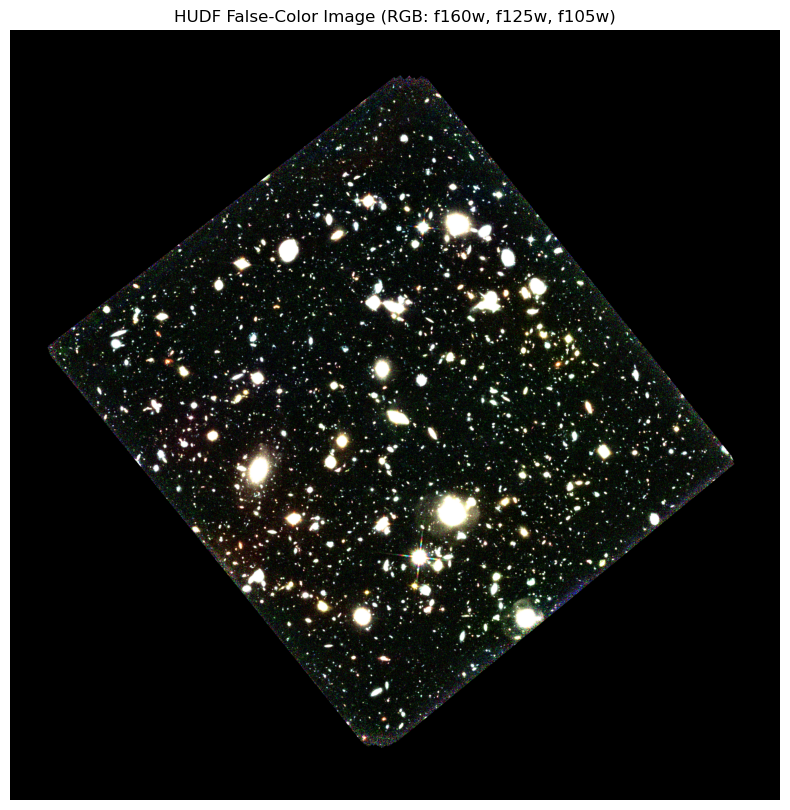

In [85]:
file_f105w = fits.open("/Users/hassanafify/Desktop/ASTR19/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")[0].data
file_f125w = fits.open("/Users/hassanafify/Desktop/ASTR19/hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")[0].data
file_f160w = fits.open("/Users/hassanafify/Desktop/ASTR19/hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")[0].data

def normalize(data, stretch=10.0):
    """Normalize data to range [0, 1] using asinh scaling."""
    data = np.clip(data, 0, None)  # Remove negative values
    return np.arcsinh(data * stretch)

red = normalize(file_f160w, stretch=10.0) * 20.0
green = normalize(file_f125w, stretch=10.0) * 20.0
blue = normalize(file_f105w, stretch=10.0) * 20.0

# Stack RGB channels
rgb_image = np.dstack((red, green, blue))

# Plot and save the false-color image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, origin="lower")
plt.axis("off")
plt.title("HUDF False-Color Image (RGB: f160w, f125w, f105w)")
plt.savefig("HUDF_false_color.png", dpi=300, bbox_inches="tight")
plt.show()